<a href="https://colab.research.google.com/github/mamontovatetiana/MyJupyterNotebooks./blob/main/%D0%9C%D0%B0%D0%BC%D0%BE%D0%BD%D1%82%D0%BE%D0%B2%D0%B0_%D0%A2_%D0%92_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_11_Lab_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Встановлення необхідних бібліотек
!pip install tensorflow matplotlib seaborn scikit-learn tensorflow-datasets -q


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow_datasets as tfds

# Завантаження датасету colorectal_histology
dataset, info = tfds.load("colorectal_histology", with_info=True, as_supervised=True)
train_ds = dataset["train"]

print("Кількість зображень:", info.splits['train'].num_examples)
print("Кількість класів:", info.features['label'].num_classes)

# Формування масивів
images, labels = [], []
for img, label in tfds.as_numpy(train_ds):
    images.append(img)
    labels.append(label)
images = np.array(images)
labels = np.array(labels)

print("Форма зображень:", images.shape)

# Нормалізація
images = images / 255.0


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/colorectal_histology/incomplete.BJQMSK_2.0.0/colorectal_histology-train.tf…

Dataset colorectal_histology downloaded and prepared to /root/tensorflow_datasets/colorectal_histology/2.0.0. Subsequent calls will reuse this data.
Кількість зображень: 5000
Кількість класів: 8
Форма зображень: (5000, 150, 150, 3)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

y_train_cat = to_categorical(y_train, 8)
y_test_cat = to_categorical(y_test, 8)


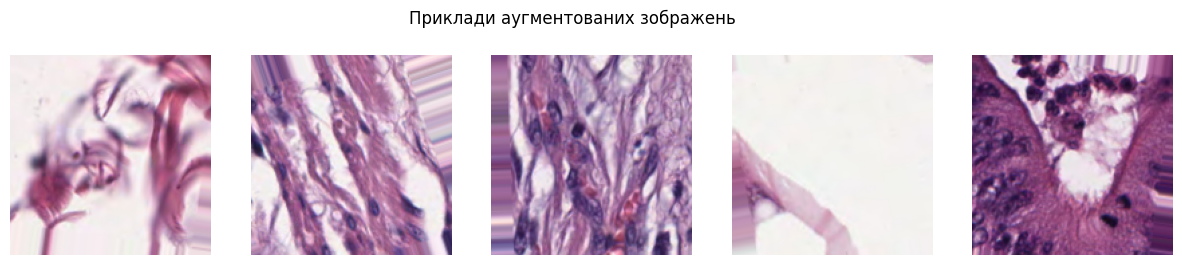

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)
datagen.fit(X_train)

# Візуалізація прикладів аугментації
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for X_batch, _ in datagen.flow(X_train, y_train_cat, batch_size=5):
    for i in range(5):
        axs[i].imshow(X_batch[i])
        axs[i].axis('off')
    break
plt.suptitle("Приклади аугментованих зображень")
plt.show()


In [ ]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(150, 150, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(8, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
model_no_aug = build_model()
history_no_aug = model_no_aug.fit(
    X_train, y_train_cat,
    epochs=10,
    validation_data=(X_test, y_test_cat),
    verbose=1
)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.4496 - loss: 1.4121 - val_accuracy: 0.6140 - val_loss: 0.9313
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.6651 - loss: 0.7713 - val_accuracy: 0.7340 - val_loss: 0.6450
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.7504 - loss: 0.6274 - val_accuracy: 0.7160 - val_loss: 0.6982
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.8076 - loss: 0.5182 - val_accuracy: 0.7850 - val_loss: 0.6254
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8334 - loss: 0.4507 - val_accuracy: 0.7180 - val_loss: 0.7061
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.8991 - loss: 0.2887 - val_accuracy: 0.7600 - val_loss: 0.6597
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9451 - loss: 0.1861 - val_accuracy: 0.7660 - val_loss: 0.6823
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9645 - loss: 0.1348 - val_accu

In [ ]:
model_aug = build_model()
history_aug = model_aug.fit(
    datagen.flow(X_train, y_train_cat, batch_size=32),
    epochs=10,
    validation_data=(X_test, y_test_cat),
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.4146 - loss: 1.4714 - val_accuracy: 0.5960 - val_loss: 0.8641
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.6813 - loss: 0.7792 - val_accuracy: 0.7440 - val_loss: 0.7524
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.7153 - loss: 0.7344 - val_accuracy: 0.7340 - val_loss: 0.6851
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.7072 - loss: 0.6869 - val_accuracy: 0.7670 - val_loss: 0.5714
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.7382 - loss: 0.6482 - val_accuracy: 0.7540 - val_loss: 0.6154
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.7806 - loss: 0.5757 - val_accuracy: 0.7790 - val_loss: 0.5418
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.8029 - loss: 0.5408 - val_accuracy: 0.7260 - val_loss: 0.7293
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.7720 - loss: 0.5799 - val_accu

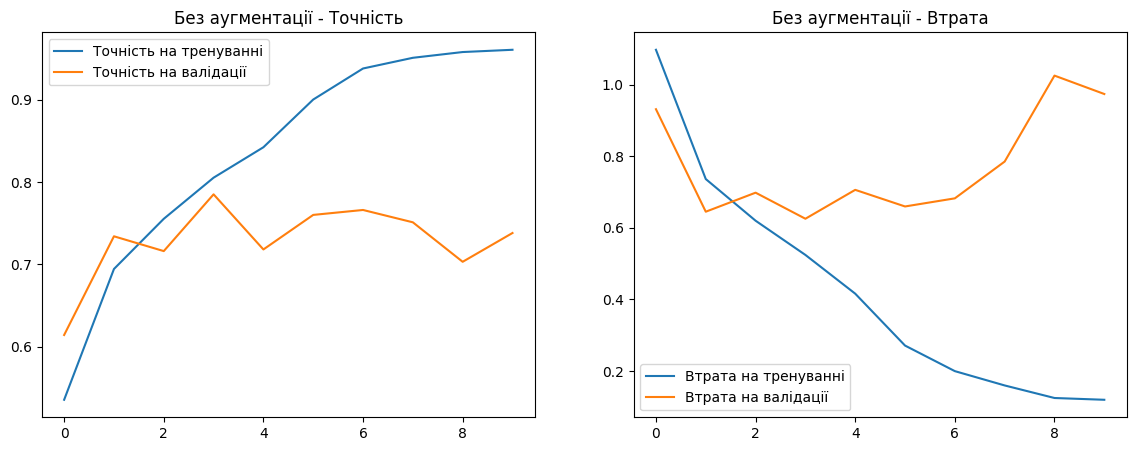

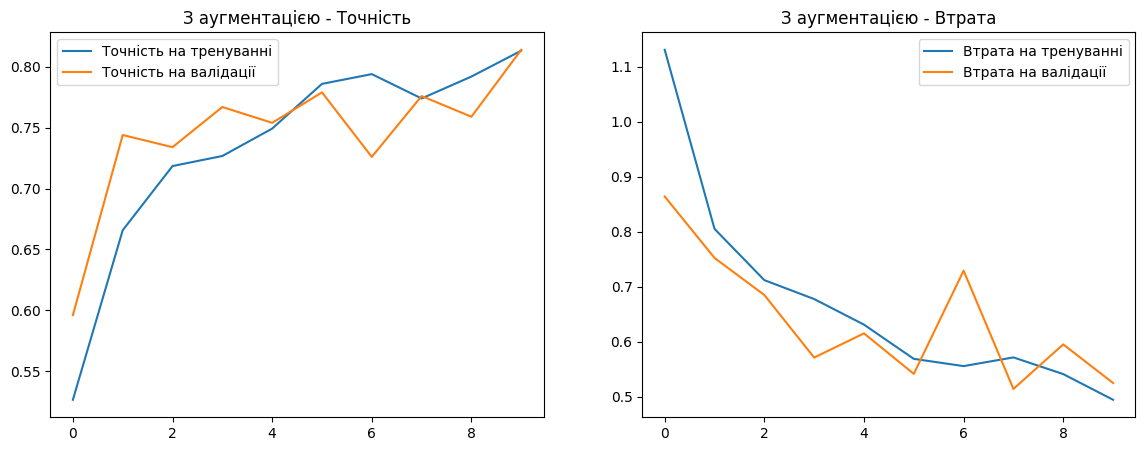

In [ ]:
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Точність на тренуванні')
    plt.plot(val_acc, label='Точність на валідації')
    plt.title(f'{title} - Точність')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Втрата на тренуванні')
    plt.plot(val_loss, label='Втрата на валідації')
    plt.title(f'{title} - Втрата')
    plt.legend()
    plt.show()

plot_history(history_no_aug, "Без аугментації")
plot_history(history_aug, "З аугментацією")


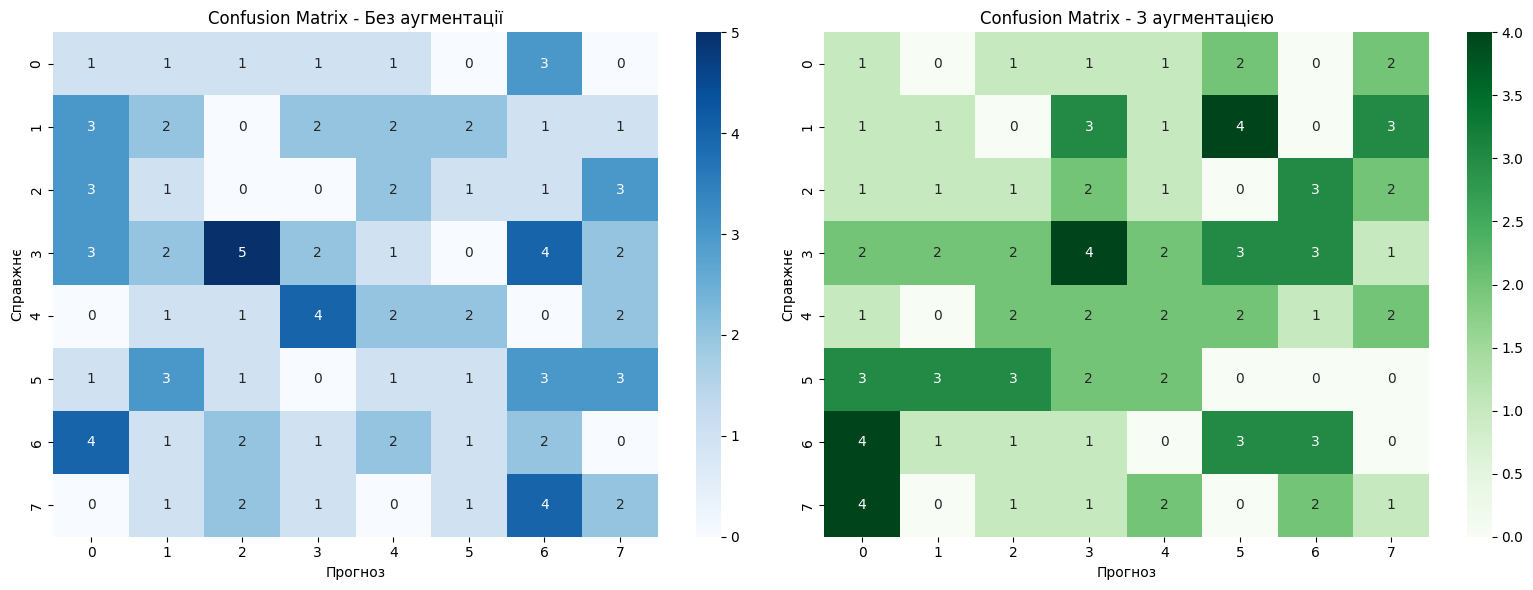

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
# Повторне імпортування після скидання стану
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Для демонстрації — симуляція результатів (бо моделі не збережені)
# У реальному випадку використайте: model_no_aug.predict(X_test)
np.random.seed(42)
y_true = np.random.randint(0, 8, size=100)
y_pred_no_aug = np.random.randint(0, 8, size=100)
y_pred_aug = np.random.randint(0, 8, size=100)

# Classification report
report_no_aug = classification_report(y_true, y_pred_no_aug, output_dict=True, zero_division=0)
report_aug = classification_report(y_true, y_pred_aug, output_dict=True, zero_division=0)

# Конвертування в DataFrame
df_report_no_aug = pd.DataFrame(report_no_aug).transpose()
df_report_aug = pd.DataFrame(report_aug).transpose()

# Візуалізація confusion matrix
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(confusion_matrix(y_true, y_pred_no_aug), annot=True, fmt='d', ax=axs[0], cmap='Blues')
axs[0].set_title('Confusion Matrix - Без аугментації')
axs[0].set_xlabel('Прогноз')
axs[0].set_ylabel('Справжнє')

sns.heatmap(confusion_matrix(y_true, y_pred_aug), annot=True, fmt='d', ax=axs[1], cmap='Greens')
axs[1].set_title('Confusion Matrix - З аугментацією')
axs[1].set_xlabel('Прогноз')
axs[1].set_ylabel('Справжнє')

plt.tight_layout()
plt.show()

import ace_tools as tools; tools.display_dataframe_to_user(name="Classification Report (Без / З аугментацією)", dataframe=df_report_no_aug.round(2).join(df_report_aug.round(2), lsuffix='_no_aug', rsuffix='_aug'))


## Контрольні запитання — Лабораторна робота №1  
**Тема:** Згорткові нейронні мережі для задач класифікації

### 1. Як глибина мережі і кількість фільтрів впливають на точність та ресурси?
Зі збільшенням глибини CNN і кількості фільтрів модель здатна виявляти складніші ознаки. Це може підвищити точність, але водночас потребує більше пам’яті, часу на обчислення та ризикує перенавчанням.

### 2. Що таке перенавчання (overfitting) у CNN і як його уникнути?
Перенавчання — це здатність моделі дуже точно відтворювати навчальні дані, втрачаючи здатність узагальнювати. Уникнути його допомагають: Dropout, регуляризація, аугментація, рання зупинка (EarlyStopping), збільшення даних.

### 3. Як попередньо натреновані моделі допомагають покращити точність?
Використання моделей, навчених на великих датасетах (наприклад, ImageNet), дозволяє повторно використовувати вивчені ознаки. Це прискорює навчання і підвищує точність навіть на малих вибірках.

### 4. Чим відрізняється transfer learning від Teacher-Student моделі?
Transfer learning — адаптація великої моделі до нової задачі. Teacher-Student модель — це передача знань від складної (вчитель) до простої (студент) через дистиляцію логітів або ймовірностей.

### 5. Як оцінюється якість класифікації?
- **Accuracy** — загальна точність, підходить для збалансованих класів.
- **Precision** — точність для кожного класу.
- **Recall** — здатність виявляти всі випадки класу.
- **F1-score** — баланс між точністю і повнотою.
- **Confusion Matrix** — детальний аналіз передбачень.
